In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing data set

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The problem statement is you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 
THE TARGET VARIABLE IS "Survived".

# DATA PREPROCESSING

In [7]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1)From the above we have observed that there is missing values in AGE,CABIN AND EMBARKED columns.
2)All the data types are correct.
3)Name,sex have categorical data

In [8]:
##checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1)Age has 177 missisng values.
2)Cabin as 687 missing values means alot of missing values.

In [13]:
#seperating the numerical and categorical columns

#checking the Categorical columns
Categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] =="object": 
        Categorical_col.append(i)
 
print("Categorical columns:  ",Categorical_col)
print("\n")


Numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !="object": 
        Numerical_col.append(i)
 
print("Numerical columns:  ",Numerical_col)
print("\n")


Categorical columns:   ['Name', 'Sex', 'Ticket', 'Embarked']


Numerical columns:   ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']




In [10]:
#Handling the missing values
#Dropping the Cabin column because lot of missing values wecant replace by mean,mode or median 
df=df.drop(columns='Cabin', axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

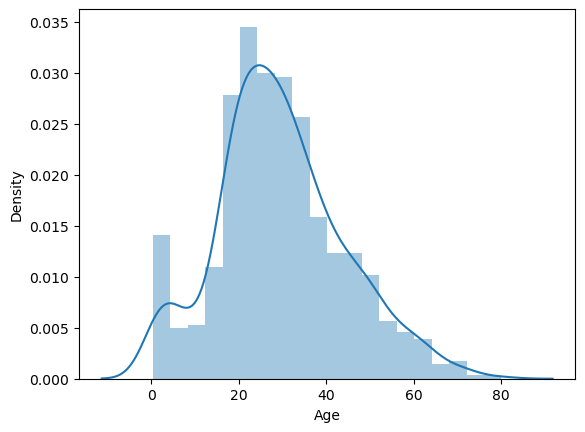

In [11]:
#replacing the missing values in "AGE" 
ax=sns.distplot(df["Age"],color=None)
plt.show

Most of the age lies in between 25 to 35. we can go with mean method

In [15]:
df['Age'].mean()

29.69911764705882

In [16]:
#filling missing values by mean method
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [17]:
#Replacing the missing values in EMBARKED column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
# embarked is a categorial column we can use mode method by replacing S value is repated
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [19]:
#checking the missing values after handling
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All the values are replaced

# EDA EXPLORATARY DATA ANALYS

In [20]:
#getting the stastical information about data for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 1)No missing values.
 2)mean and median doesnot have huge difference in continuous columns

In [21]:
#finding the no of people are survied  and not survived
#checking no of unique values in target column
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0    549
1    342
Name: Survived, dtype: int64


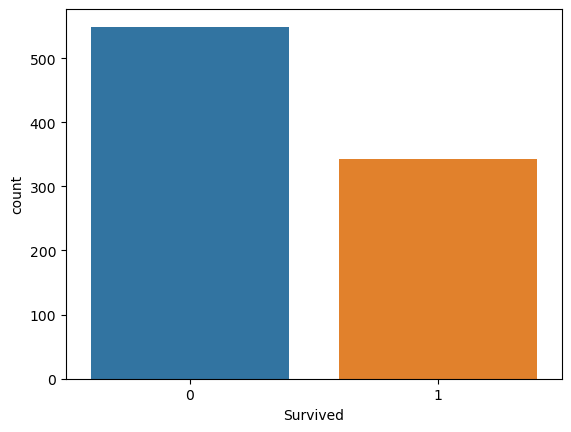

In [23]:
#making a count plot for 'Survived' column
ax=sns.countplot(x="Survived", data=df)
print(df['Survived'].value_counts())

Most people not survived when compared to survived.. column is also balanced

male      577
female    314
Name: Sex, dtype: int64


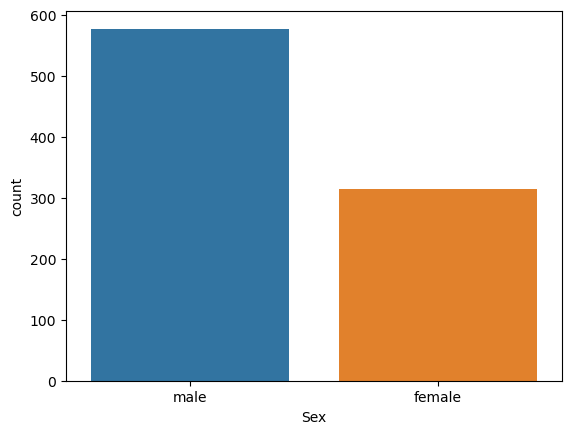

In [24]:
#making a count plot for 'Sex' column
ax=sns.countplot(x="Sex", data=df)
print(df['Sex'].value_counts())

we can see male passengers are more than female passengers

<Axes: xlabel='Sex', ylabel='count'>

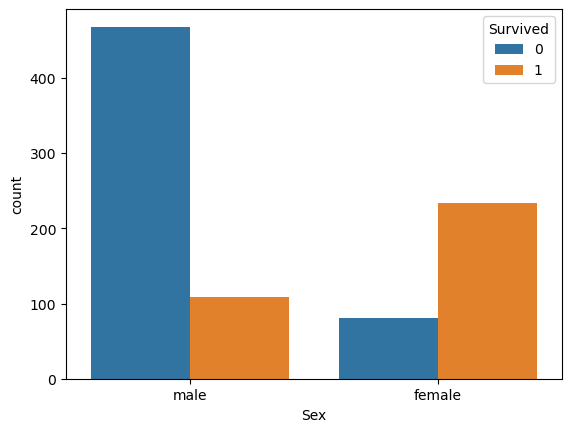

In [26]:
#comparing the no of people survived with gender
sns.countplot(x='Sex', hue='Survived', data=df)

we can observe lot of male passemgers are not survived when compare to female.

3    491
1    216
2    184
Name: Pclass, dtype: int64


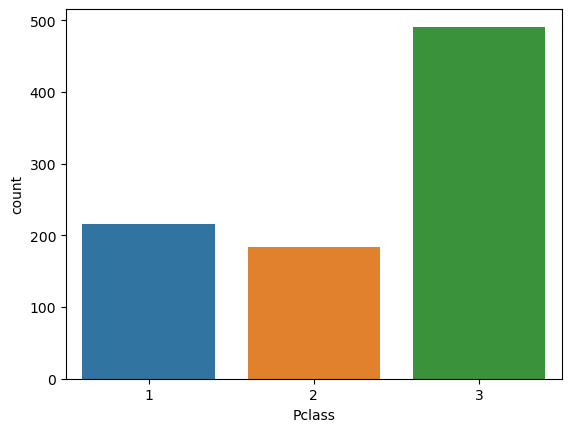

In [27]:
#making a count plot for 'Pclass' column
ax=sns.countplot(x="Pclass", data=df)
print(df['Pclass'].value_counts())

More people are in 3rd class

<Axes: xlabel='Pclass', ylabel='count'>

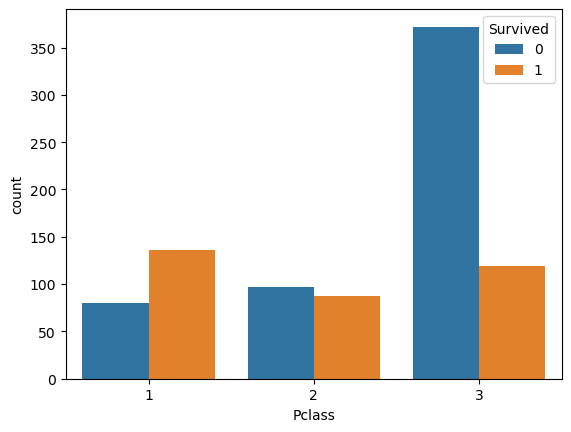

In [28]:
#comparing the no of people survived with gender
sns.countplot(x='Pclass', hue='Survived', data=df)

we can observe 3rd class are not survived when compare to 1st and 2nd class.

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


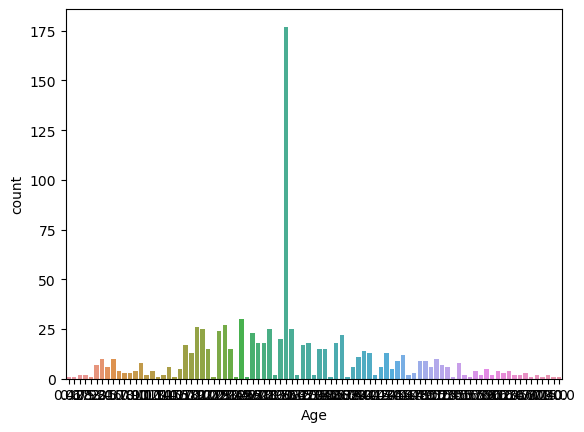

In [29]:
#making a count plot for 'Sex' column
ax=sns.countplot(x="Age", data=df)
print(df['Age'].value_counts())

<Axes: xlabel='Age', ylabel='count'>

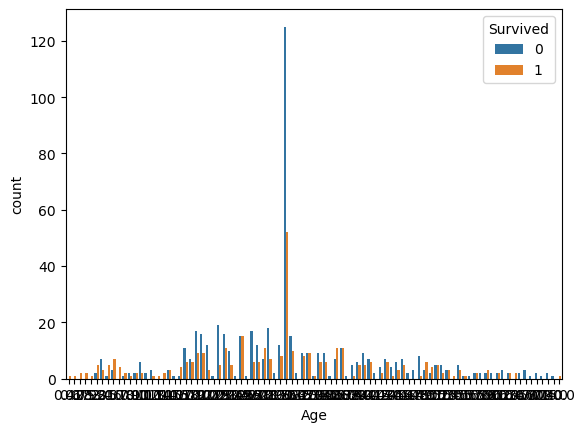

In [30]:
sns.countplot(x='Age', hue='Survived', data=df)

Encoding the categorical

In [31]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))#we want to reshape because the data will present in np.arrary formart
df    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,2.0
887,888,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,2.0
888,889,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,2.0
889,890,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000,0.0


Dropping the unwanted colums like Passengerid it does not contain any weightage

In [32]:
df=df.drop(columns='PassengerId', axis =1)

In [33]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,2.0
887,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,2.0
888,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,2.0
889,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000,0.0


Checking the correlation 

In [34]:
#check the corr
cor = df.corr()
cor

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.162098
Name,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,-0.006117
Sex,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.108262
Age,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.068230
Parch,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.039798
Ticket,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.001729
Fare,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.224719
Embarked,-0.167675,0.162098,-0.006117,0.108262,-0.026749,0.068230,0.039798,-0.001729,-0.224719,1.000000


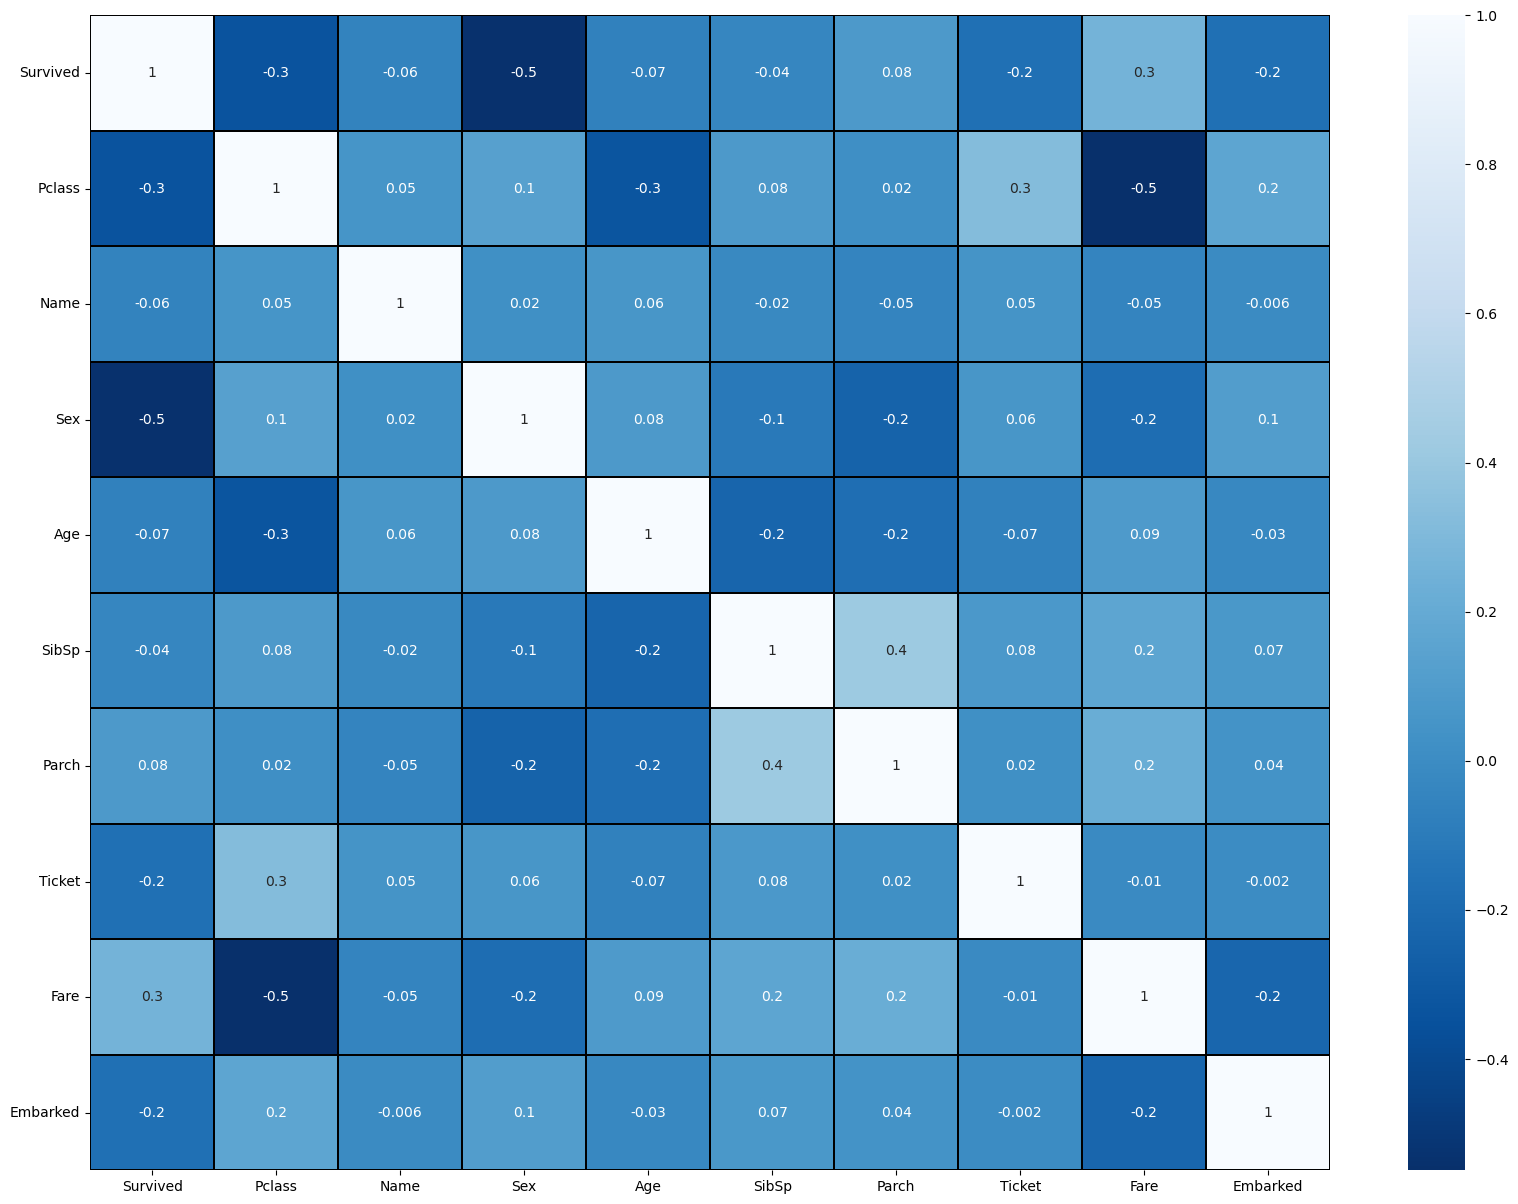

In [35]:
#by using heatmap we can also visuilaze the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g', linecolor="black", annot=True, cmap="Blues_r")#fmt=how many decimals, annot is usedto see values on map
plt.yticks(rotation=0);
plt.show()

1)From the above we can observe there is a no correlation between features and target.all are in acceptable range.

# Seperating the label and features

In [36]:
x=df.drop('Survived', axis=1)
y=df["Survived"]

In [37]:
print(x)
print(y)

     Pclass   Name  Sex        Age  SibSp  Parch  Ticket     Fare  Embarked
0         3  108.0  1.0  22.000000      1      0   523.0   7.2500       2.0
1         1  190.0  0.0  38.000000      1      0   596.0  71.2833       0.0
2         3  353.0  0.0  26.000000      0      0   669.0   7.9250       2.0
3         1  272.0  0.0  35.000000      1      0    49.0  53.1000       2.0
4         3   15.0  1.0  35.000000      0      0   472.0   8.0500       2.0
..      ...    ...  ...        ...    ...    ...     ...      ...       ...
886       2  548.0  1.0  27.000000      0      0   101.0  13.0000       2.0
887       1  303.0  0.0  19.000000      0      0    14.0  30.0000       2.0
888       3  413.0  0.0  29.699118      1      2   675.0  23.4500       2.0
889       1   81.0  1.0  26.000000      0      0     8.0  30.0000       0.0
890       3  220.0  1.0  32.000000      0      0   466.0   7.7500       1.0

[891 rows x 9 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
8

NO SCALING IS REQUIRED FOR THE DATA BEACAUSE NO DIFFERENCE IN UNITS 

# DATA MODELLING¶

TRAIN TEST SPLIT- Dividing the data into train test split

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score,recall_score ,classification_report, f1_score, precision_score
from sklearn.model_selection import cross_val_score

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=10)

In [58]:
models=[LogisticRegression(),DecisionTreeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),
        BaggingClassifier(),SVC(),KNC(),RandomForestClassifier() ]

In [59]:
def accuracyscore_train_test():
    
    for model in models:
        model.fit(x_train,y_train)
        y_train_pred = model.predict(x_train)
        y_test_pred =model.predict(x_test)
        
        print("Model performance for Training set")
        print(model)
        print('accuracyscore :',  '=',accuracy_score(y_train,y_train_pred)*100)
        print('f1Score :',  '=',  f1_score(y_train,y_train_pred)*100)
        print('precision :',  '=',  precision_score(y_train,y_train_pred)*100)
        print('recall:',  '=',  recall_score(y_train,y_train_pred)*100)
        
        print("Model performance for Testing set")
        print('accuracyscore :',  '=',accuracy_score(y_test,y_test_pred)*100)
        print('f1Score :', '=',  f1_score(y_test,y_test_pred)*100)
        print('precision :',  '=',  precision_score(y_test,y_test_pred)*100)
        print('recall:', '=',  recall_score(y_test,y_test_pred)*100)
        print('-'*30) 
        print("\n")
              

In [60]:
accuracyscore_train_test()

Model performance for Training set
LogisticRegression()
accuracyscore : = 79.19161676646706
f1Score : = 71.80527383367141
precision : = 77.97356828193833
recall: = 66.54135338345864
Model performance for Testing set
accuracyscore : = 81.61434977578476
f1Score : = 70.50359712230217
precision : = 77.77777777777779
recall: = 64.47368421052632
------------------------------


Model performance for Training set
DecisionTreeClassifier()
accuracyscore : = 100.0
f1Score : = 100.0
precision : = 100.0
recall: = 100.0
Model performance for Testing set
accuracyscore : = 82.51121076233184
f1Score : = 75.77639751552795
precision : = 71.76470588235294
recall: = 80.26315789473685
------------------------------


Model performance for Training set
AdaBoostClassifier()
accuracyscore : = 84.58083832335329
f1Score : = 80.15414258188824
precision : = 82.21343873517787
recall: = 78.19548872180451
Model performance for Testing set
accuracyscore : = 82.95964125560538
f1Score : = 75.64102564102564
precision : 

WE can observe from the above..
1)logistic regerssion is underfitted its Training score is less than testing.
2)Decisiontresclassifier  and RandomForestClassifier is overfitted.
3)Svc does not have any difference in training and testing score..
4)Remaining models adaboostclassifier,gradientboosting,knn classifier,baggingclassifer have good results we can compare with cross validation score and select the best model

# Cross validation score

In [61]:
best_models=[AdaBoostClassifier(),GradientBoostingClassifier(),
        BaggingClassifier(),KNC() ]

In [62]:
def compare_models_cross_validation():
    
    for model in best_models:
        
        cv_score = cross_val_score(model, x, y, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        
        
        print('Cross Validation Score for the', model, '=', cv_score)
        print('Mean Accuracy  of the', model, '=', mean_accuracy,'%')
        print('-'*30) 
        print("\n") 

In [63]:
compare_models_cross_validation()

Cross Validation Score for the AdaBoostClassifier() = [0.80446927 0.80337079 0.81460674 0.79213483 0.83707865]
Mean Accuracy  of the AdaBoostClassifier() = 81.03320569957944 %
------------------------------


Cross Validation Score for the GradientBoostingClassifier() = [0.79888268 0.81460674 0.87078652 0.79213483 0.85393258]
Mean Accuracy  of the GradientBoostingClassifier() = 82.606867114431 %
------------------------------


Cross Validation Score for the BaggingClassifier() = [0.82681564 0.78651685 0.83707865 0.84831461 0.83707865]
Mean Accuracy  of the BaggingClassifier() = 82.7160881300609 %
------------------------------


Cross Validation Score for the KNeighborsClassifier() = [0.62569832 0.64044944 0.6741573  0.62921348 0.62921348]
Mean Accuracy  of the KNeighborsClassifier() = 63.97464063775029 %
------------------------------


Cross Validation Score for the BaggingClassifier() = [0.77653631 0.80898876 0.86516854 0.79775281 0.83146067]
Mean Accuracy  of the BaggingClassifier

# Model selection¶

THE LOWEST SCORE DIFFERENCE BETWEEN THE MODEL AND CROSS VALIDATION SCORE IS THE BEST MODEL

In [64]:
#difference between models and cross validation score
print("Diff between Accuracy score and cross_validation score  for AdaBoostClassifier is =",   81.03 -82.95)
print("Diff between Accuracy score and cross_validation score  for GradientBoostingClassifier is =", 82.60 -86.09)
print("Diff between Accuracy score and cross_validation score  for BaggingClassifier is =",  81.59 -82.95)
print("Diff between Accuracy score and cross_validation score  for KNeighborsClassifier is =", 63.97 -67.71)

Diff between Accuracy score and cross_validation score  for AdaBoostClassifier is = -1.9200000000000017
Diff between Accuracy score and cross_validation score  for GradientBoostingClassifier is = -3.490000000000009
Diff between Accuracy score and cross_validation score  for BaggingClassifier is = -1.3599999999999994
Diff between Accuracy score and cross_validation score  for KNeighborsClassifier is = -3.739999999999995


from the above Gradient Boosting Classifier is the best model has lowest difference between ACCURACY SCORE and CROSS VALIDATION SCORE

In [67]:
from sklearn.model_selection import GridSearchCV

parameters ={
             'bootstrap': [True,False],
             'max_samples' : [1.0,2.0],
             'max_features' : [1.0,2.0],
             'n_estimators' :[5,10],
             'random_state' :[1,10,50],'n_jobs' :[None,-1],'bootstrap' :[True,False],'bootstrap_features' :[True,False], 
               'oob_score' : [True,False], 'warm_start' :[True,False],'base_estimator': ['deprecated']
             }

In [68]:
BCV=GridSearchCV(BaggingClassifier(),parameters,cv=5)

In [69]:
BCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'base_estimator': ['deprecated'],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [1.0, 2.0], 'max_samples': [1.0, 2.0],
                         'n_estimators': [5, 10], 'n_jobs': [None, -1],
                         'oob_score': [True, False],
                         'random_state': [1, 10, 50],
                         'warm_start': [True, False]})

In [70]:
BCV.best_params_

{'base_estimator': 'deprecated',
 'bootstrap': False,
 'bootstrap_features': True,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'warm_start': True}

In [75]:
final_model=BaggingClassifier(oob_score = 10,
                              max_features=1.0, 
                              n_estimators=10,
                              random_state=10,  max_samples=1.0,
                              base_estimator= 'deprecated',bootstrap_features=True )
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc= accuracy_score(y_test,pred)
print(acc*100)

86.54708520179372


BY PERFORMING HYPERPARAMETER TUNING USING GIRDSEARCHCV there is a increase in ACCURACY_SCORE from 82.95 to 86.54.

BAGGINGCLASSIFIER IS THE BEST MODEL

PLOTTING ROC AND compare AUC FOR ALL MODELS

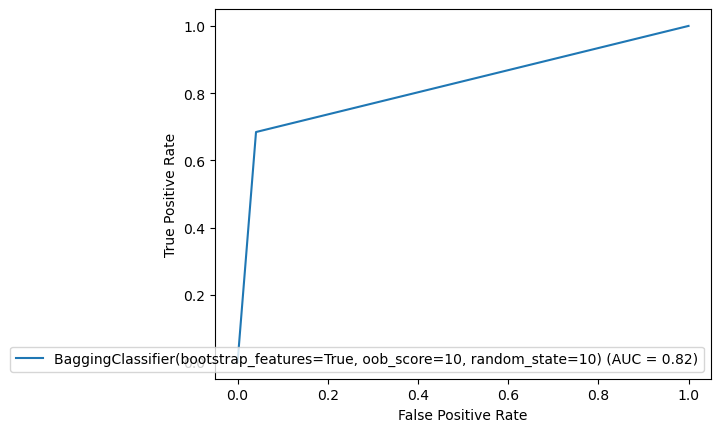

In [77]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import metrics
fpr,tpr, thresholds=metrics.roc_curve(y_test, pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=final_model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 82%

In [78]:
#saving model using .pkl
import joblib
joblib.dump(final_model,"titanic_survived.pkl")

['titanic_survived.pkl']